<a href="https://colab.research.google.com/github/AjayanN/coco-vs-ash/blob/master/ashcoco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install fastai

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

## Here I tried to take some images from google using 'download all images' extension from chrome web store. It helped me a lot in starting on my simple classification using fastai module from fast.ai 

In [ ]:
path_img='/content/cocovscucu'

## get_image_files is for having a quick look into the folder path and taking all the images stored in it.

In [ ]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/cocovscucu/coconut_300.jpeg'),
 PosixPath('/content/cocovscucu/coconut_228.jpeg'),
 PosixPath('/content/cocovscucu/ashguord_47.jpeg'),
 PosixPath('/content/cocovscucu/ashguord_104.jpeg'),
 PosixPath('/content/cocovscucu/coconut_326.jpeg')]

bs is specified on the batch size and if it exceeds the cpu power, then setting it to bs=16 also works. The re module in python helps to work on regular expressions which all are build over by fastai, so it is no needed to be explicitly called.

In [ ]:
bs = 64
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpeg$'

ImageDataBunch is used to take the image path, take the image file, transform it to 224 x 224 image with a batch size of 64 images per cycle.

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

show_batch shows some images to start with to see how its uploaded.

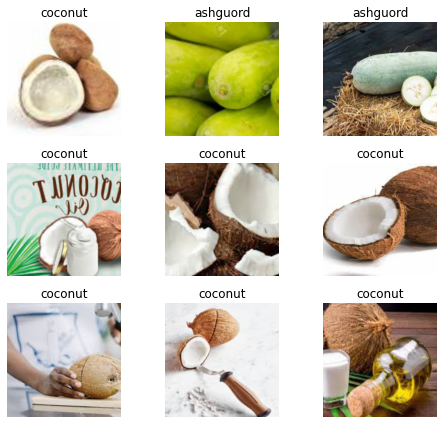

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['ashguord', 'coconut']


(2, 2)

In [ ]:
The convolutional neural netowrk used here is resnet34.

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


.model gives us an overview of the model skeletal structure.


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

fit_one_cycle starts the learning by the deep neural network. The error_rate after 3 epochs was just 3% which is very much low.

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.799897,0.326527,0.080882,02:59
1,0.520109,0.219343,0.051471,03:00
2,0.391093,0.198493,0.036765,03:04
3,0.294445,0.185670,0.029412,03:01


In [ ]:
learn.save('stage-3percent')

Here we try to extract the top losses that made the model go wrong in some situations.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

From the below plot we get that it was not the model it was me who actually went wrong, by giving faulty data and labeling it under ashguord or coconut. But in some areas it was not able to perfectly get the difference.

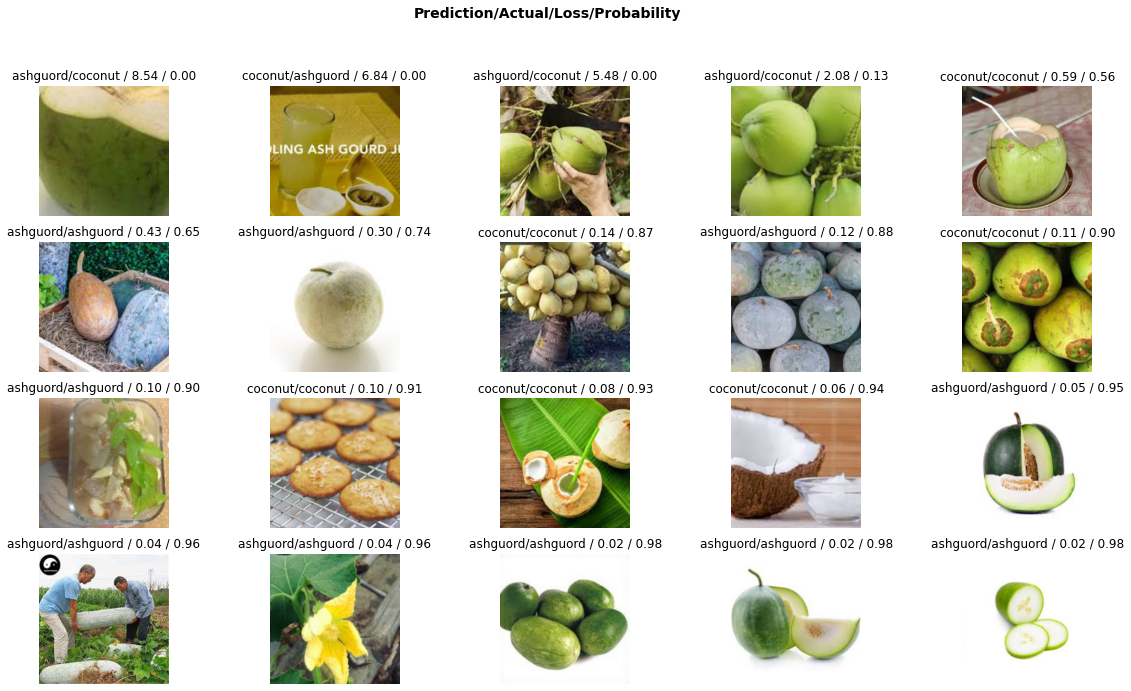

In [ ]:
interp.plot_top_losses(20, figsize=(20,11))

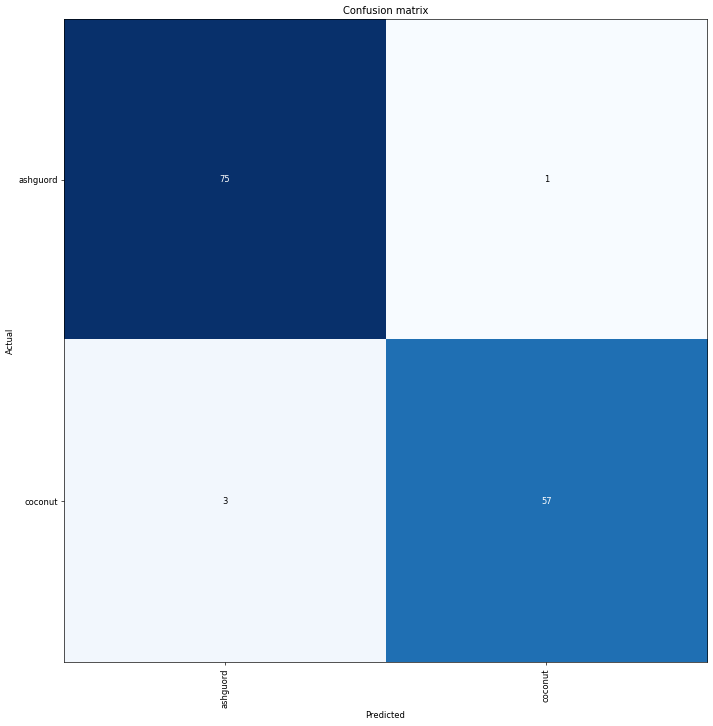

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [ ]:
learn.unfreeze()

In [ ]:
learn.load('stage-3percent');

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


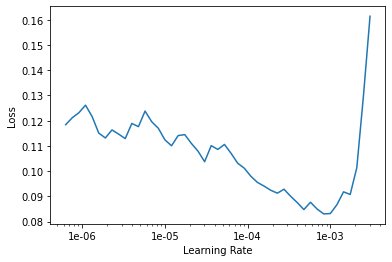

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.157845,0.177309,0.029412,04:22
1,0.117837,0.154707,0.036765,04:19


This experiment was only done to get a starting practical knowledge on how fastai helps making deep learning easier. As it is built on pytorch and not old tensorflow.  Just a joke....